# TRABAJO PRÁCTICO Nº 2

**Alumnos:**
- Nahuel Arrieta
- Lucas moyano

In [1]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(image_name):
  image_path = "./images/" + image_name

  # Read the image
  image = cv2.imread(image_path)
  if image is None:
    sys.exit("Could not read the image " + image_path)
  return image

In [3]:
def show_image(label, image):
  # Show the image
  cv2.imshow(label, image)

  # Close the image
  cv2.waitKey(0)
  cv2.destroyAllWindows()

## Seccion 1: Histogramas

### 1. Calcular el histograma de una imagen en escala de grises y de cada canal de una imagen a color. Visualizar los histogramas usando Matplotlib.

In [4]:
def calculate_histogram(image, channels=None):
    if channels:
        histograms = []
        for i in channels:
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            histograms.append(hist)
        return histograms
    else:
        # Histograma para imagen en escala de grises
        return cv2.calcHist([image], [0], None, [256], [0, 256])


In [5]:
def plot_histogram(histograms, labels, title="Histograma", colors=None):
    plt.figure(figsize=(10, 5))
    for i, hist in enumerate(histograms):
        plt.plot(hist, color=colors[i] if colors else 'black', label=labels[i])
    plt.title(title)
    plt.xlabel('Valor de intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

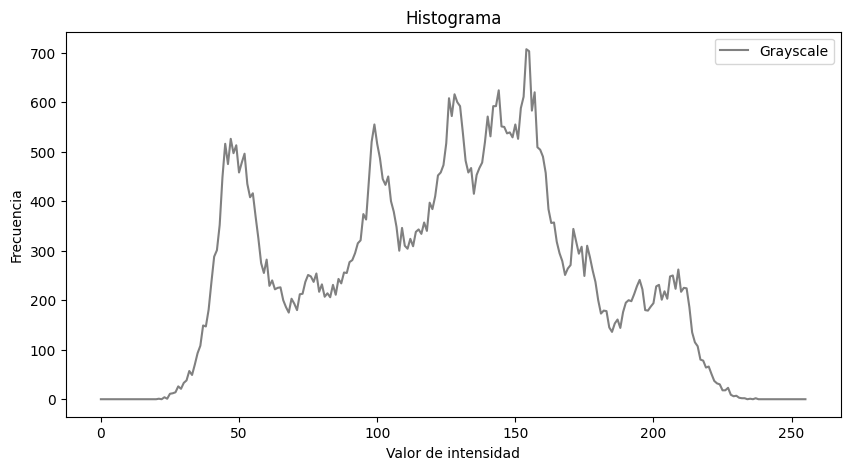

In [6]:
image = read_image("Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist_gray = calculate_histogram(gray_image)
plot_histogram([hist_gray], ["Grayscale"], colors=['gray'])

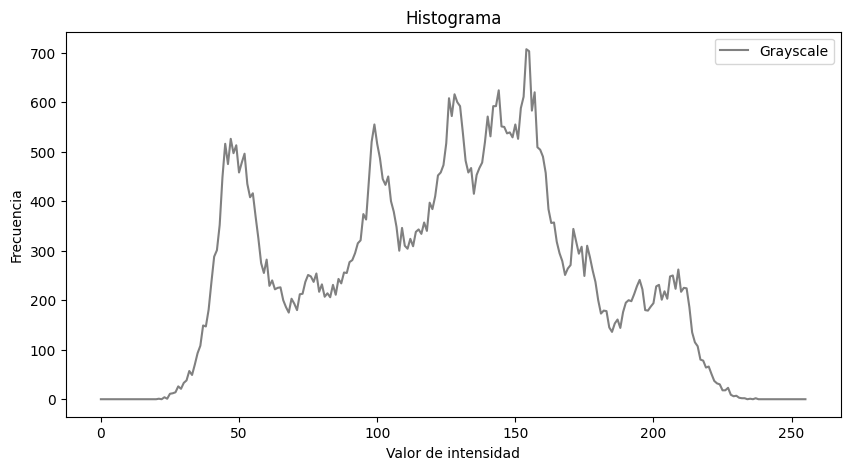

In [7]:
image = read_image("Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist_gray = calculate_histogram(gray_image)
plot_histogram([hist_gray], ["Grayscale"], colors=['gray'])

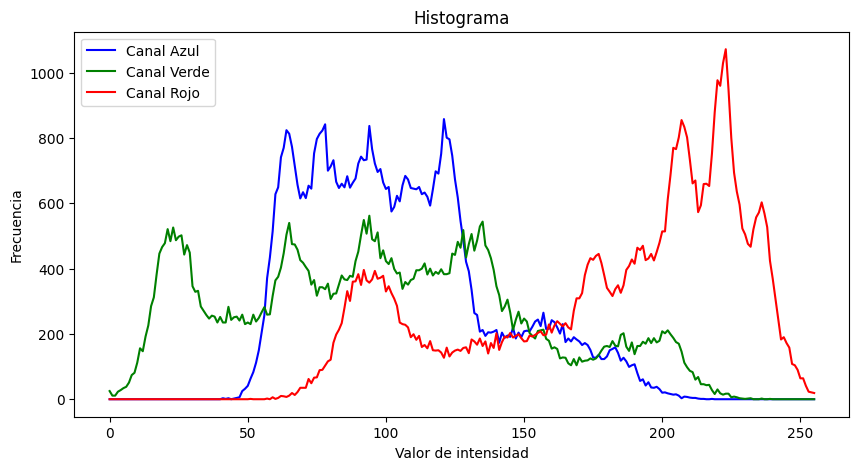

In [8]:
image = read_image("Lenna.png")
hist_channels = calculate_histogram(image, channels=[0, 1, 2])
plot_histogram(hist_channels, labels=["Canal Azul", "Canal Verde", "Canal Rojo"],  colors=["blue", "green", "red"])

### 2. Convertir una imagen de color a escala de grises y HSV. Extraer cada canal de color por separado y mostrarlo con histograma.

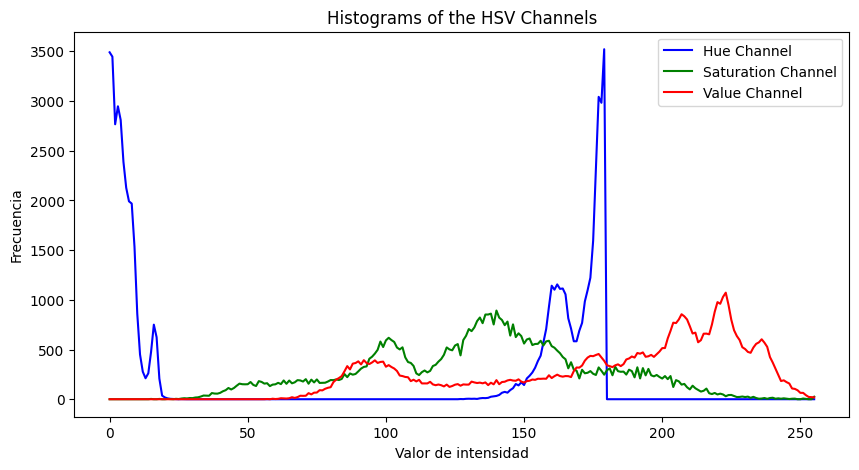

In [9]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hist_channels_hsv = calculate_histogram(hsv_image, channels=[0, 1, 2])
plot_histogram(hist_channels_hsv, labels=["Hue Channel", "Saturation Channel", "Value Channel"], title="Histograms of the HSV Channels", colors=["blue", "green", "red"])

### 3. Cargar una imagen en escala de grises y a color. Posteriormente, modificar un conjunto de p´ıxeles en una regi´on espec´ıfica (por ejemplo, convertir una zona a negro). Calcular el negativo de una imagen invirtiendo los valores de p´ıxeles.

In [10]:
def modify_region_to_black(image, start_x, start_y, width, height):
    image_copy = image.copy()
    image_copy[start_y:start_y + height, start_x:start_x + width] = 0  
    return image_copy
    

In [11]:
def calculate_negative(image):
    return 255 - image

In [ ]:
image = read_image("Lenna.png")

modified_image = modify_region_to_black(image, 100, 100, 200, 200)
show_image("Modified Image", modified_image)

negative_image = calculate_negative(image)
show_image("Negative Image", negative_image)

In [ ]:
image = read_image("Lenna.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

modified_image = modify_region_to_black(image, 100, 100, 200, 200)
show_image("Modified Image", modified_image)

negative_image = calculate_negative(image)
show_image("Negative Image", negative_image)



qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/nahuel/Documents/Facultad/PDI/tps-proc-imagenes/.venv/lib/python3.12/site-packages/cv2/qt/plugins"
